In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
file_path = "C:/Users/ds2.Vimalan/Downloads/videogamesales.csv"
df = pd.read_csv(file_path)
df.head(4)

Rank               Name Platform  Year     Genre Publisher  NA_Sales  \
0     1         Wii Sports      Wii  2006    Sports  Nintendo     41.49   
1     2  Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   
2     3     Mario Kart Wii      Wii  2008    Racing  Nintendo     15.85   
3     4  Wii Sports Resort      Wii  2009    Sports  Nintendo     15.75   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00

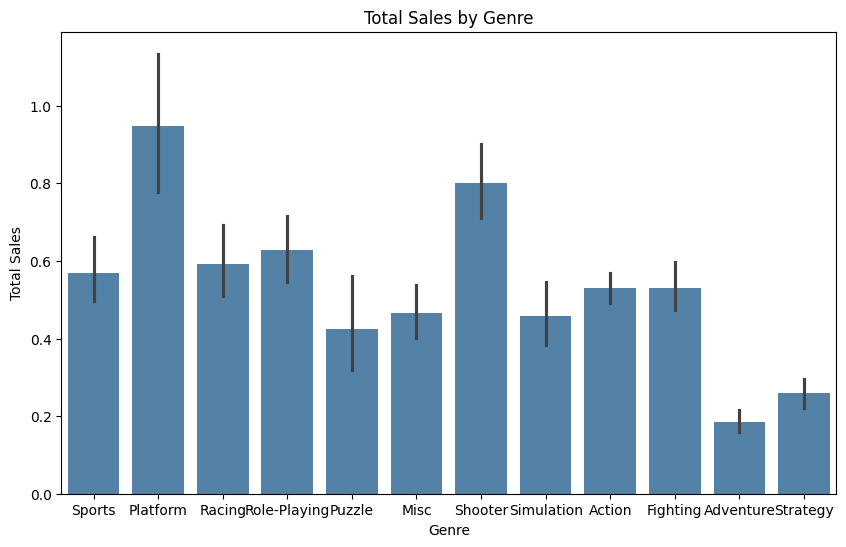

In [4]:
#Top Genre
plt.figure(figsize=(10, 6))  
sns.barplot(x='Genre', y='Global_Sales', data = df, color='steelblue')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show();

C:\Users\Samuel Raj\AppData\Local\Temp\ipykernel_16192\958843848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")


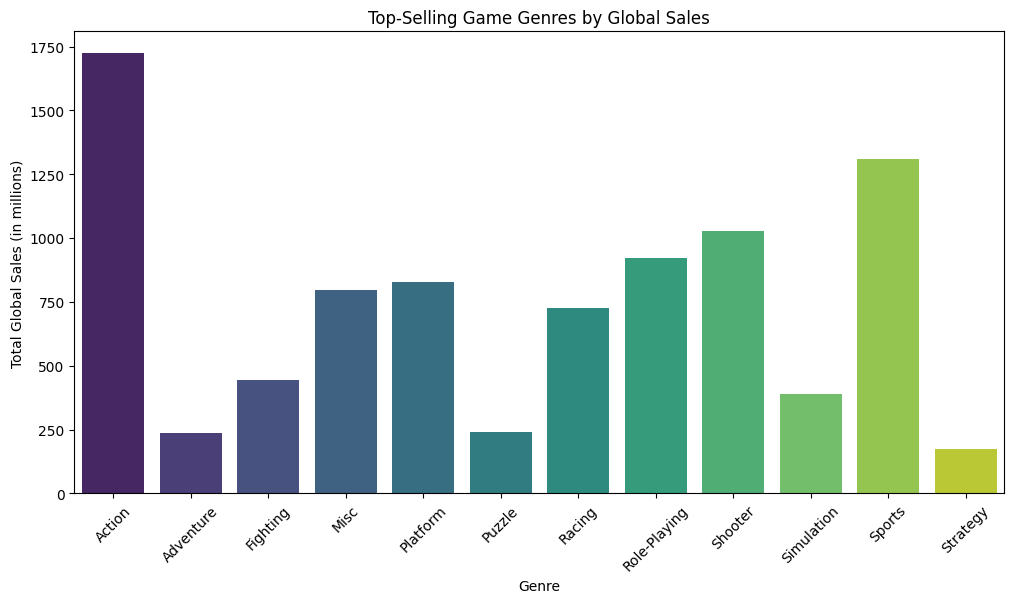

In [ ]:
eda = df.copy()
eda.columns = eda.columns.str.replace(" ", "_").str.lower()

# Bar Chart - Top-Selling Genre
genre_sales = eda.groupby("genre")["global_sales"].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top-Selling Game Genres by Global Sales")
plt.xlabel("Genre")
plt.ylabel("Total Global Sales (in millions)")
plt.show();


In [16]:
# Encode categorical features
le = LabelEncoder()
categorical_cols = ['Platform', 'Genre', 'Publisher']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
# Drop missing values
df.dropna(inplace=True)
df.shape[0],df.shape[1]

(16327, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  int64  
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  int64  
 5   Publisher     16327 non-null  int64  
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.4+ MB


In [ ]:
df.describe()

Rank      Platform          Year         Genre     Publisher  \
count  16327.000000  16327.000000  16327.000000  16327.000000  16327.000000   
mean    8292.868194     15.795921   2006.406443      4.925951    292.609604   
std     4792.669778      8.372097      5.828981      3.760823    176.949418   
min        1.000000      0.000000   1980.000000      0.000000      0.000000   
25%     4136.500000      7.000000   2003.000000      1.000000    137.000000   
50%     8295.000000     16.000000   2007.000000      5.000000    323.000000   
75%    12441.500000     21.000000   2010.000000      8.000000    455.000000   
max    16600.000000     30.000000   2020.000000     11.000000    576.000000   

           NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales  
count  16327.000000  16327.000000  16327.000000  16327.000000  16327.000000  
mean       0.265415      0.147554      0.078661      0.048325      0.540232  
std        0.821591      0.508766      0.311557      0.189885      1.565732  
min        0.000000      0.000000      0.000000      0.000000      0.010000  
25%        0.000000      0.000000      0.000000      0.000000      0.060000  
50%        0.080000      0.020000      0.000000      0.010000      0.170000  
75%        0.240000      0.110000      0.040000      0.040000      0.480000  
max       41.490000     29.020000     10.220000     10.570000     82.740000

In [18]:

# Define target variable (High Sales: 1, Low Sales: 0)
median_sales = df['Global_Sales'].median()
df['High_Sales'] = np.where(df['Global_Sales'] > median_sales, 1, 0)
df.drop(columns=['Name'], inplace=True)
df.head(4)

Rank  Platform  Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
0     1        26  2006     10        359     41.49     29.02      3.77   
1     2        11  1985      4        359     29.08      3.58      6.81   
2     3        26  2008      6        359     15.85     12.88      3.79   
3     4        26  2009     10        359     15.75     11.01      3.28   

   Other_Sales  Global_Sales  High_Sales  
0         8.46         82.74           1  
1         0.77         40.24           1  
2         3.31         35.82           1  
3         2.96         33.00           1

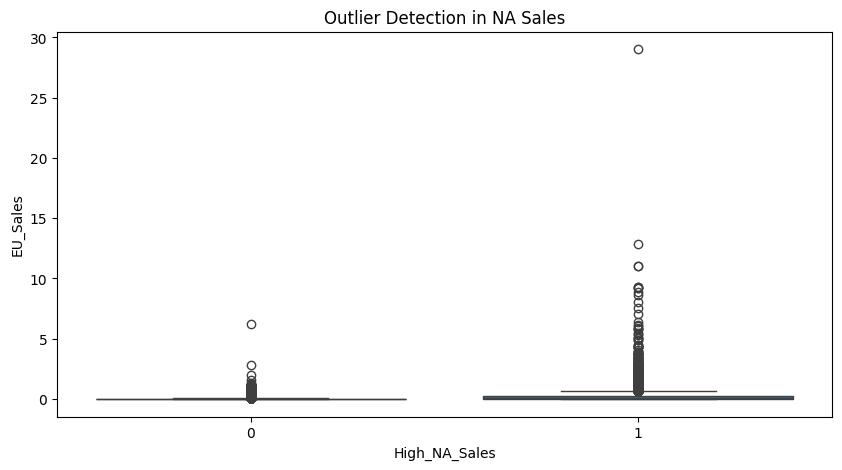

In [22]:
# Problem 1: Outlier Detection in NA Sales
median_na_sales = df['NA_Sales'].median()
df['High_NA_Sales'] = np.where(df['NA_Sales'] > median_na_sales, 1, 0)
df.drop(columns=['NA_Sales'], inplace=True)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['High_NA_Sales'], y=df['EU_Sales'])
plt.title("Outlier Detection in NA Sales")
plt.show();

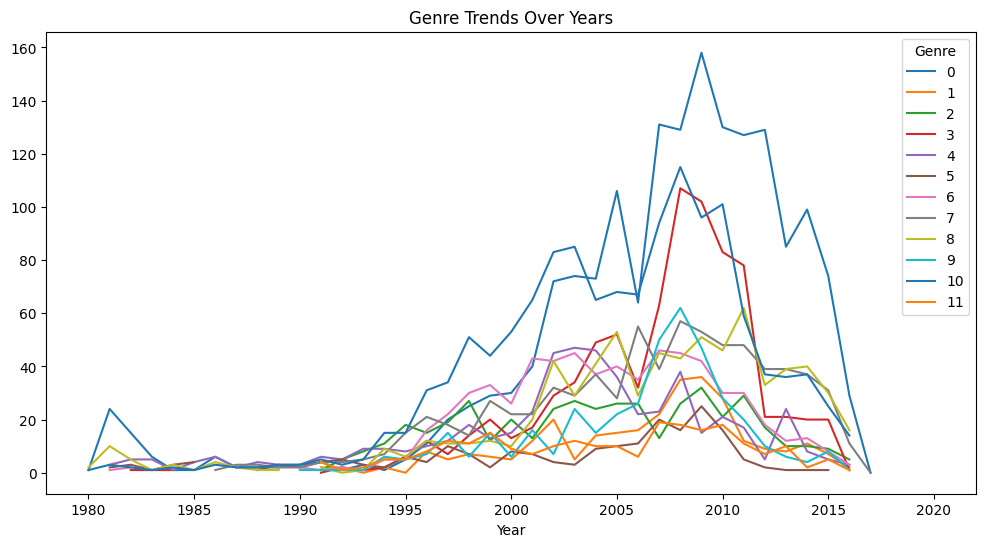

In [ ]:
# Problem 2: Genre Trends Over Time Prediction
median_sales = df['Global_Sales'].median()
df['High_Sales'] = np.where(df['Global_Sales'] > median_sales, 1, 0)
df['Year'] = df['Year'].astype(int)
genre_trends = df.groupby(['Year', 'Genre'])['High_Sales'].sum().unstack()
genre_trends.plot(kind='line', figsize=(12, 6), title="Genre Trends Over Years")
plt.show();

C:\Users\Samuel Raj\AppData\Local\Temp\ipykernel_16192\1153138875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Platform", y="Global_Sales", data=df, palette="Set2")


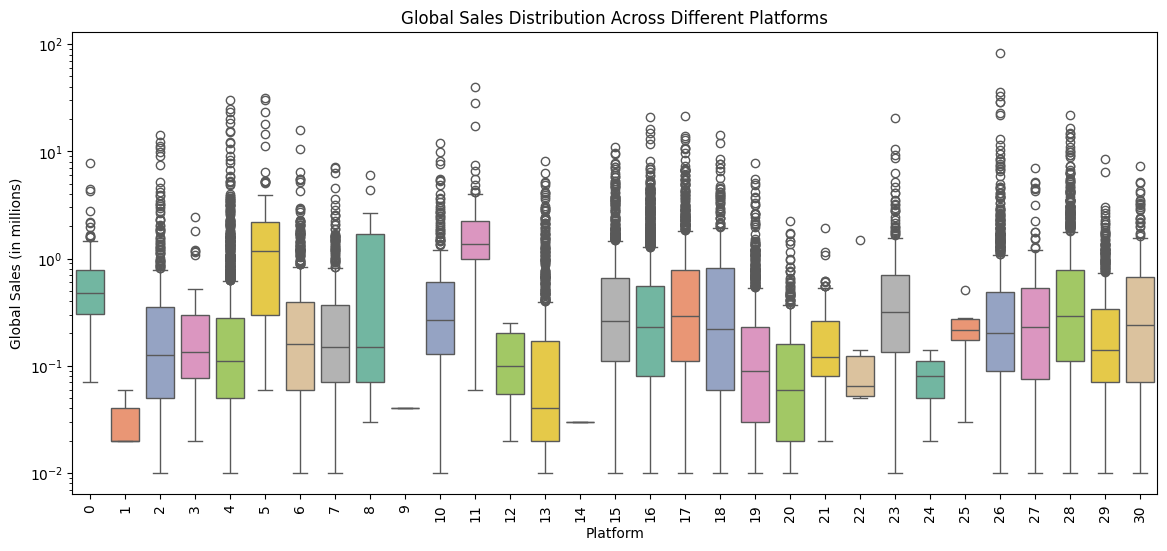

In [26]:

# 3️⃣ Box Plot - Sales Distribution per Platform
plt.figure(figsize=(14, 6))
sns.boxplot(x="Platform", y="Global_Sales", data=df, palette="Set2")
plt.xticks(rotation=90)
plt.title("Global Sales Distribution Across Different Platforms")
plt.xlabel("Platform")
plt.ylabel("Global Sales (in millions)")
plt.yscale("log")  # Using log scale to handle outliers
plt.show();

In [ ]:
# Split data
X = df.drop(columns=['High_NA_Sales', 'High_Sales'])
y = df['High_NA_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)*100

97.97893189612935

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4155  118]
 [  47 3844]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4273
           1       0.97      0.99      0.98      3891

    accuracy                           0.98      8164
   macro avg       0.98      0.98      0.98      8164
weighted avg       0.98      0.98      0.98      8164



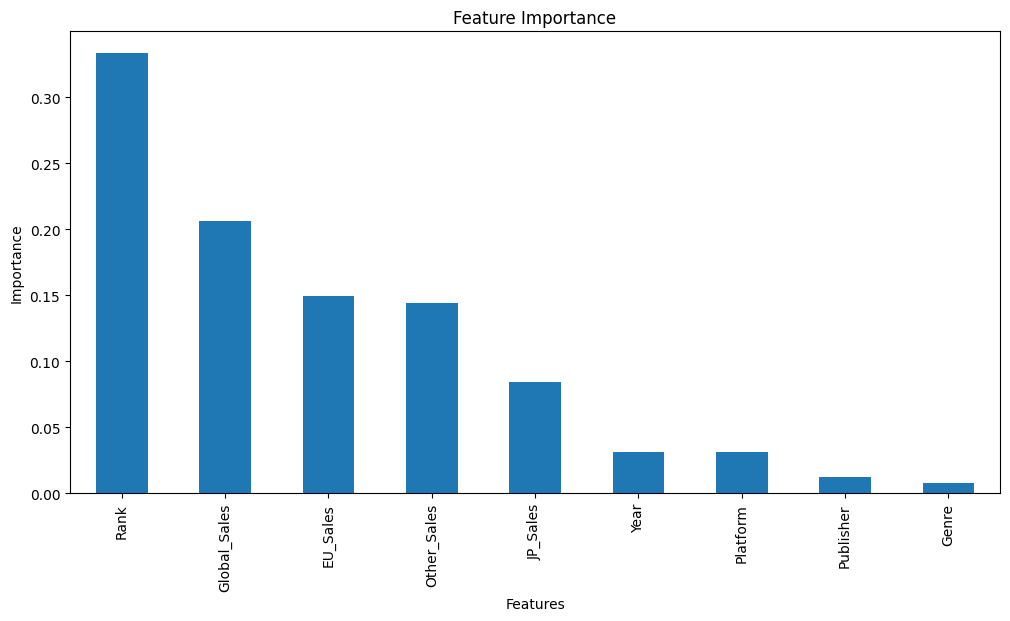

In [ ]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Feature Importance')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show();
